In [1]:
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd

Using TensorFlow backend.


In [2]:
model = load_model('model_mlp_5_to_x1_plus_x1.h5')
stdc = joblib.load('stdsc_mlp_5_to_x1_plus_x1.m')

In [3]:
data = pd.read_csv('data_python.csv')
P2 = 1 - data['P1']
data['P2'] = P2
train_x1 = data[['Y1', 'Y2', 'U1', 'U2']].values.reshape(233600, 4)
train_x2 = data[['P1', 'P2', 'DP1', 'DP2', 'X1']].values.reshape(233600, 5)
train_y = data['X1'].values.reshape(233600, 1)
index1 = [i * 146 for i in range(1600)]
index2 = [(i + 1) * 146 - 1 for i in range(1600)]
train_x1 = np.delete(train_x1, index2, axis=0)
train_x2 = np.delete(train_x2, index2, axis=0)
train_x = np.hstack((train_x1, train_x2))
train_x = stdc.transform(train_x)

In [4]:
train_y = np.delete(train_y, index1, axis=0)
X_train = train_x[:186880, :]
X_test = train_x[186880:, :]
Y_train = train_y[:186880, :]
Y_test = train_y[186880:, :]

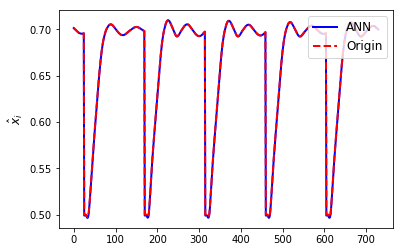

In [5]:
pred = model.predict(X_test)
plt.plot(pred[:730, 0], linewidth=2, label='ANN', color='blue')
plt.plot(Y_test[:730, 0], linewidth=2, label='Origin', color='red', linestyle='--')
plt.ylabel('$\hat{x}_{i}$', fontsize=12)
plt.legend(fontsize=12, loc=1)
plt.show()

In [6]:
pred = model.predict(train_x)

In [12]:
pred.shape

(232000, 1)

In [13]:
error = pred - train_y

In [14]:
max(error)

array([ 0.0005663])

In [15]:
min(error)

array([-0.00200652])

In [17]:
sum(abs(error)) / 1600

array([ 0.06408053])

In [18]:
err = []
for i in range(145):
    err_sum = 0
    for j in range(1600):
        err_sum += error[j * 145 + i]
    err.append(err_sum / 1600)
err = np.array(err)
err.shape

(145, 1)

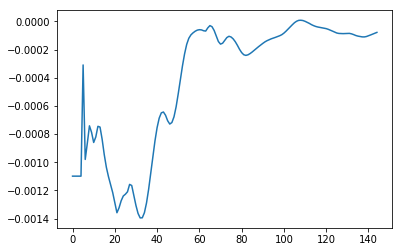

In [19]:
plt.plot(err)
plt.show()

In [22]:
np.save('err', err)

In [34]:
[1,2,3][-1]

3

In [43]:
np.dot(error.T, error) / error.shape[0]

array([[  3.97047551e-07]])

array([ -7.81541823e-05])